MNIST classification (drawn from sklearn example)
=====================================================
MWEM is not particularly well suited for image data (where there are tons of features with relatively large ranges) but it is still able to capture some important information about the underlying distributions if tuned correctly.

We use a feature included with MWEM that allows a column to be specified for a custom bin count, if we are capping every other bin count at a small value. In this case, we specify that the numerical column (784) has 10 possible values. We do this with the dict {'784': 10}.

Here we borrow from a scikit-learn example, and insert MWEM synthetic data into their training example/visualization, to understand the tradeoffs.

https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html#sphx-glr-download-auto-examples-linear-model-plot-sparse-logistic-regression-mnist-py


In [1]:
import warnings
warnings.filterwarnings('ignore')
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# pip install scikit-image
from skimage import data, color
from skimage.transform import rescale 

# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
data = fetch_openml('mnist_784', version=1, return_X_y=False)

In [2]:
data_np = np.hstack((data.data,np.reshape(data.target.to_numpy().astype(int), (-1, 1))))


In [3]:
from snsynth.mwem import MWEMSynthesizer

# Here we set max bin count to be 10, so that we retain the numeric labels
synth = MWEMSynthesizer(10.0, 40, 15, 10, split_factor=1, max_bin_count = 128, custom_bin_count={'784':10})
synth.fit(data_np)

In [4]:
sample_size = 2000
synthetic = synth.sample(sample_size)


Trained on Real Data
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84        40
         1.0       0.83      1.00      0.91        53
         2.0       0.73      0.50      0.59        32
         3.0       0.75      0.71      0.73        38
         4.0       0.67      0.83      0.74        42
         5.0       0.65      0.65      0.65        40
         6.0       0.85      0.80      0.82        35
         7.0       0.70      0.57      0.63        40
         8.0       0.66      0.63      0.64        30
         9.0       0.65      0.62      0.63        50

    accuracy                           0.73       400
   macro avg       0.73      0.72      0.72       400
weighted avg       0.73      0.73      0.73       400

Accuracy real: 0.7325

Trained on Synthetic Data
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        40
         1.0       0.17      0.66      0.27        53
       

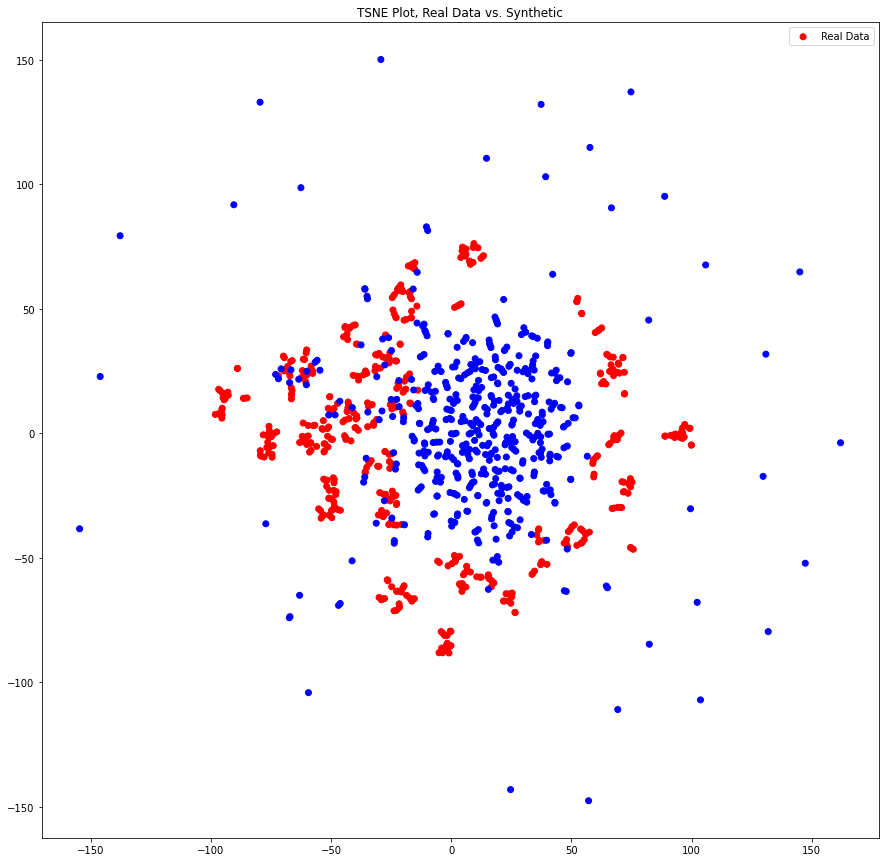

In [5]:
from sklearn.linear_model import RidgeClassifier

import utils

real = pd.DataFrame(data_np[:sample_size])

model_real, model_fake = utils.test_real_vs_synthetic_data(real, synthetic, RidgeClassifier, tsne=True)

Example run in 97.597 s


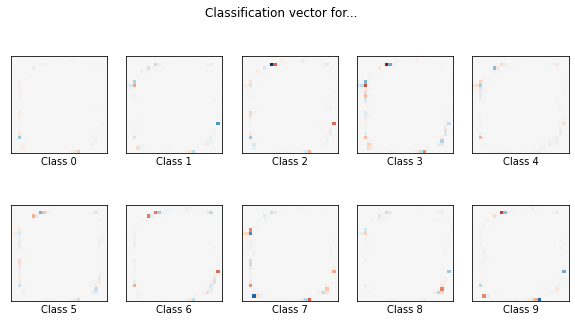

In [6]:
# Classification 
coef = model_real.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()

Example run in 97.912 s


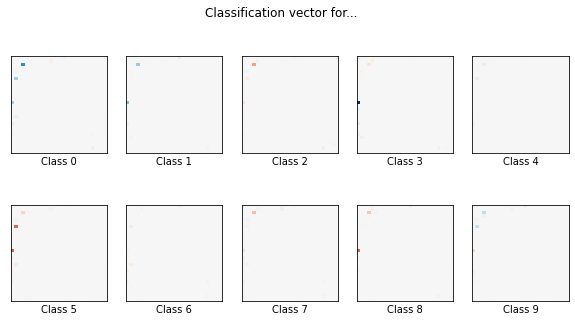

In [7]:
coef = model_fake.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()